In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
url = "https://www.snapdeal.com/products/mens-footwear-sports-shoes"

headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/120.0.0.0 Safari/537.36"
    ),
    "Accept-Language": "en-US,en;q=0.9", #language declared - and priority
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8", #content type in webpage
    "Connection": "keep-alive",
}

response = requests.get(url, headers=headers)
print(response.status_code)

soup = BeautifulSoup(response.text, "html.parser")
print(soup.head)

200
<head prefix="og: https://ogp.me/ns# fb: https://ogp.me/ns/fb# snapdeallog: https://ogp.me/ns/fb/snapdeallog#">
<link href="https://i1.sdlcdn.com" rel="dns-prefetch"/>
<link href="https://i2.sdlcdn.com" rel="dns-prefetch"/>
<link href="https://i3.sdlcdn.com" rel="dns-prefetch"/>
<link href="https://i4.sdlcdn.com" rel="dns-prefetch"/>
<link href="https://g.sdlcdn.com" rel="dns-prefetch"/>
<link href="https://sa.snapdeal.com" rel="dns-prefetch"/>
<link href="https://search-suggester.snapdeal.com" rel="dns-prefetch"/>
<link href="https://mobileapi.snapdeal.com" rel="dns-prefetch"/>
<link href="/manifest.json" rel="manifest"/>
<link as="script" crossorigin="anonymous" href="https://i1.sdlcdn.com/js/1743595968340/snap/base.jquery112.min.js" rel="preload"/>
<link href="https://i4.sdlcdn.com/css/1743595968340/snap/common/scss/base.min.css" rel="stylesheet" type="text/css">
<link href="https://www.snapdeal.com/opensearch.xml" rel="search" type="application/opensearchdescription+xml">
<link

In [3]:
products = soup.find_all("div", class_="product-tuple-listing")

data = []

for product in products:
    # Product Name
    name = product.find("p", class_="product-title")
    name = name.text.strip() if name else None

    # Brand
    brand = name.split()[0] if name else "Unknown"

    # Discounted Price
    discounted_price = product.find("span", class_="product-price")
    discounted_price = discounted_price.text.strip() if discounted_price else None

    # Original Price
    original_price = product.find("span", class_="product-desc-price")
    original_price = original_price.text.strip() if original_price else None

    # Discount Percentage
    discount = product.find("div", class_="product-discount")
    discount = discount.text.strip() if discount else None

    # Rating
    rating = product.find("span", class_="filled-stars")
    rating = rating.get("style") if rating else None
    if rating:
        rating = re.findall(r"width:(\d+)%", rating)
        rating = round(int(rating[0]) / 20, 1) if rating else None

    # Number of Reviews
    reviews = product.find("p", class_="product-rating-count")
    reviews = reviews.text.strip("()") if reviews else "0"

    data.append([
        name,
        brand,
        original_price,
        discounted_price,
        discount,
        rating,
        reviews
    ])


In [4]:
columns = [
    "Product Name",
    "Brand",
    "Original Price",
    "Discounted Price",
    "Discount Percentage",
    "Rating",
    "Number of Reviews"
]

df = pd.DataFrame(data, columns=columns)

df.to_csv("snapdeal_products.csv", index=False)

print("Data saved to snapdeal_products.csv")


Data saved to snapdeal_products.csv


In [5]:
df["Original Price"] = df["Original Price"].str.replace("Rs.", "").str.replace(",", "").astype(float)
df["Discounted Price"] = df["Discounted Price"].str.replace("Rs.", "").str.replace(",", "").astype(float)
#These lines remove currency symbols and commas from price columns and convert them into numeric values so calculations and graphs can be performed.

In [6]:
top_brands = df["Brand"].value_counts().head(10)
print(top_brands)

Brand
Westchic            3
SELVIFAB            2
Sheetal             2
True                2
MOHINIENTERPRISE    1
Tokyo               1
JASH                1
ROTSISE             1
Miss                1
RAABTA              1
Name: count, dtype: int64


In [7]:
df["Discount Percentage"] = df["Discount Percentage"].str.replace("% Off", "").astype(float)
print(df["Discount Percentage"].describe())

count    20.000000
mean     72.950000
std      10.480433
min      50.000000
25%      67.500000
50%      73.500000
75%      78.250000
max      92.000000
Name: Discount Percentage, dtype: float64


In [8]:
df.columns

Index(['Product Name', 'Brand', 'Original Price', 'Discounted Price',
       'Discount Percentage', 'Rating', 'Number of Reviews'],
      dtype='object')

In [9]:
brand_counts = df["Brand"].value_counts().head(10)

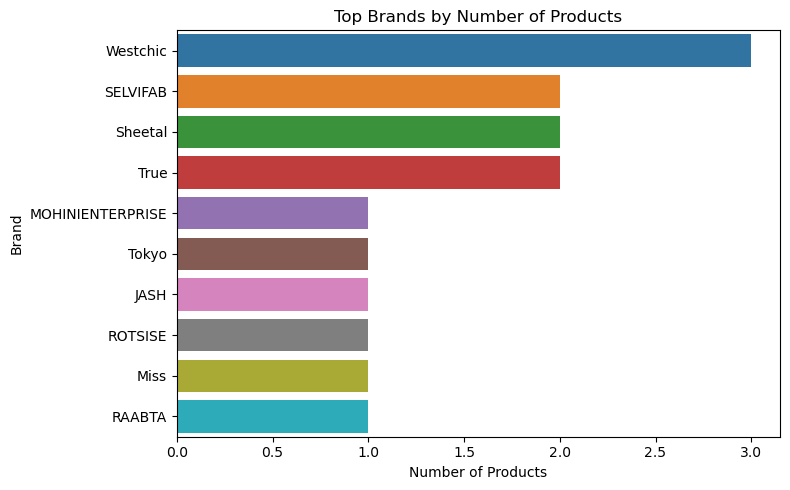

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    x=brand_counts.values,
    y=brand_counts.index
)

plt.title("Top Brands by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

In [11]:
print(type(brand_counts))
print(brand_counts)

<class 'pandas.core.series.Series'>
Brand
Westchic            3
SELVIFAB            2
Sheetal             2
True                2
MOHINIENTERPRISE    1
Tokyo               1
JASH                1
ROTSISE             1
Miss                1
RAABTA              1
Name: count, dtype: int64


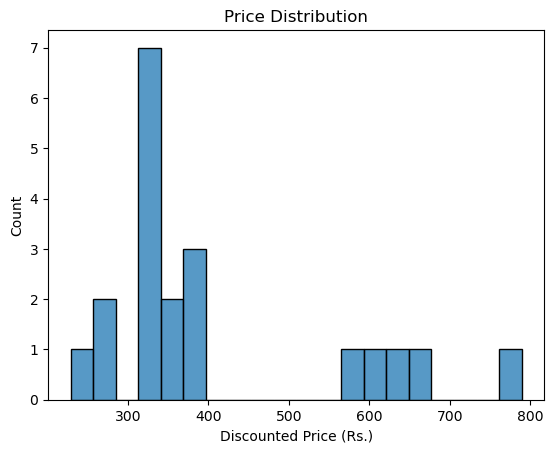

In [12]:
plt.figure()
sns.histplot(df["Discounted Price"], bins=20)
plt.title("Price Distribution")
plt.xlabel("Discounted Price (Rs.)")
plt.show()